Logistic Classification
=======================

$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{donde}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

$\newcommand{\eqdef}{\equiv}$

**1.** Seleccionar cualquier Dataset de [LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/).


In [365]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


We define a few helpers.

In [366]:
def find(x):
   return np.nonzero(x)[0]

Two Classes Logistic Classification
-----------------------------------
La clasificación logística es, con [support vector machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine), el método de referencia para realizar la clasificación. Su principal ventaja sobre SVM es que es es un problema de minimización suave, y que también da salida a la clase
ofreciendo una interpretación probabilística de la clasificación.


Para comprender el comportamiento del método, generamos datos sintéticos distribuidos según una mezcla de Gaussianas con un solapamiento gobernado por un offset $\omega$.  Aquí los índices de las clases se fijan en $y_i \in
\{-1,1\}$ para simplificar las ecuaciones.

In [367]:
n = 1000 # numero de muestras
p = 2 # Dimension
omega = np.array([1,.5])*2.5 # offset
n1 = int(n/2)
X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))



Grafiquemos

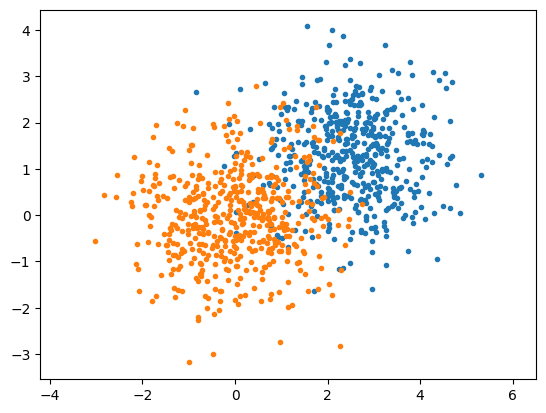

In [368]:
I = find(y== -1)
J = find(y==  1)
plt.clf
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal');

La clasificación logística minimiza una pérdida logística en lugar de la habitual
$\ell^2$ loss para regression
  $$ \umin{w} E(w) \eqdef \frac{1}{n} \sum_{i=1}^n L(\dotp{x_i}{w},y_i)  $$
donde la regresion logistica es
  $$ L( s,y ) \eqdef \log( 1+\exp(-sy) ) $$
Esto corresponde a una minimización convexa suave. Si $X$ es inyectiva,
esto también es estrictamente convexa, por lo tanto, tiene un único mínimo global.


Comparemos la pérdida binaria (ideal) 0-1, la pérdida logística y la pérdida
<https://en.wikipedia.org/wiki/Hinge_loss hinge loss>
(utilizado para SVM).

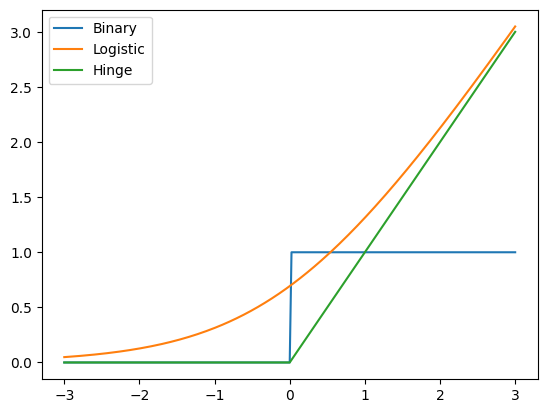

In [369]:
t = np.linspace(-3,3,255).transpose()
plt.clf
plt.plot(t, t>0)
plt.plot(t, np.log(1+np.exp(t)))
plt.plot(t, np.maximum(t,0) )
plt.axis('tight');
plt.legend(['Binary', 'Logistic', 'Hinge']);

Esto puede interpretarse como una <https://en.wikipedia.org/wiki/Maximum_likelihood_estimation maximum likelihood estimator> cuando se
modela la probabilidad de pertenecer a las dos clases para la muestra $x_i$ como

  $$ h(x_i) \eqdef (\th(x_i),1-\th(x_i)) $$
donde $$ \th(s) \eqdef \frac{e^{s}}{1+e^s} = (1+e^{-s})^{-1}  $$


Reescribiendo la energía para minimizar
  $$ E(w) = \Ll(X w,y) \qwhereq \Ll(s,y)= \frac{1}{n}  \sum_i L(s_i,y_i), $$
su gradiente se lee
$$ \nabla E(w) = X^\top \nabla \Ll(X w,y) $$
donde
$$ \nabla \Ll(s,y) = \frac{y}{n} \odot \th(-y \odot s)  $$
donde $\odot$ es el operador de multiplicación puntual,  y en Python es *.


Definir las energías.

In [370]:
def L(s,y):
  return 1/n * sum( np.log( 1 + np.exp(-s*y) ) )

def E(w,X,y):
   return L(X.dot(w),y);

Definamos el gradiente

In [371]:
def theta(v):
   return 1 / (1+np.exp(-v))
 
def nablaL(s,r):
  return - (1/n) * y * theta(-s * y)

def nablaE(w,X,y):
  return X.transpose().dot( nablaL(X.dot(w),y) )

_Importante:_ in para mejorar el rendimiento, es importante (especialmente en dimensiones bajas $p$) añadir un término de sesgo constante $w_{p+1} \in \RR$, y reemplaza $\dotp{x_i}{w}$
by $ \dotp{x_i}{w} + w_{p+1} $.  Esto se consigue de forma equivalente
añadiendo un $(p+1)^{\text{esimo}}$ igual a 1 a cada
$x_i$, lo que hacemos utilizando una macro comodo.

In [372]:
def AddBias(X):
  return np.hstack(( X, np.ones((np.size(X,0),1)) ))

Con este término de sesgo añadido, una vez $w_{\ell=0} \in \RR^{p+1}$ inicializado
(for instance at $0_{p+1}$),

In [373]:
w = np.zeros((p+1,1))
w

array([[0.],
       [0.],
       [0.]])

Realiza un paso de descenso de gradiente
$$ w_{\ell+1} = w_\ell - \tau_\ell \nabla E(w_\ell). $$

In [374]:
tau = 1; # tau fijo
w = w - tau * nablaE(w,AddBias(X),y)
w

array([[-6.25547267e-01],
       [-3.23491281e-01],
       [-4.85722573e-17]])

$$\tau < \frac{2}{L}$$
$$ L \leq \frac{1}{4}\norm{X}^2 $$
Si uno escoje
$$\tau < \tau_{\max} \eqdef \frac{2}{\frac{1}{4}\norm{X}^2},$$
entonces se asegura que el descenso del gradietne converga

In [375]:
np.linalg.norm(X)
tau_max = 2/(1/4 * np.linalg.norm(AddBias(X), 2)**2 )
print(tau_max)

0.001474285115906827


__Exercise 1__

Implemente un graiente descendente
$$ w_{\ell+1} = w_\ell - \tau_\ell \nabla E(w_\ell). $$
Moniotrice la energia
Prueba diferentes tamaños de paso y compáralos con la teoría (en particular
traza en el dominio logarítmico para ilustrar la tasa lineal).


Text(0.5, 1.0, 'E(w)')

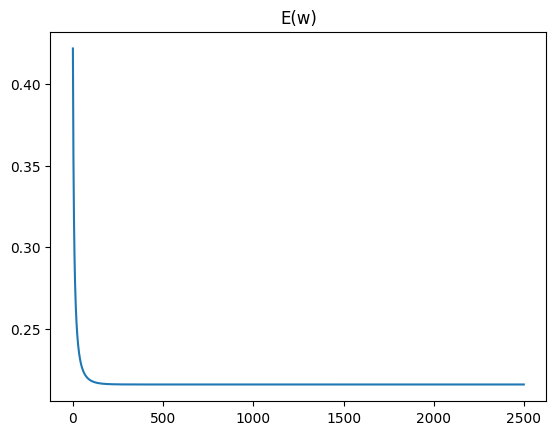

In [376]:
import numpy as np
import matplotlib.pyplot as plt


# def E(w, X, y):
#   return 1/len(y) * np.sum(np.log(1 + np.exp(-X.dot(w) * y)))
# def nablaE(w, X, y):
#   return X.transpose().dot(-y * (1 - 1/(1 + np.exp(-X.dot(w) * y))))

iter = 2500
energia = np.zeros(iter)
x = np.zeros(iter)

for i in range(iter):
  w = w - tau * nablaE(w,AddBias(X),y)
  energia[i] = E(w,AddBias(X),y)[0]
  x[i] = i

plt.figure(1)
plt.plot(x, energia)
plt.title('E(w)')


In [377]:
print(w)

[[-2.21547275]
 [-1.20205283]
 [ 3.63375384]]


Generemo una grid 2D de puntos.

In [378]:
g = 201
tx = np.linspace( X[:,0].min(), X[:,0].max(),num=g)
ty = np.linspace( X[:,1].min(), X[:,1].max(),num=g)
[B,A] = np.meshgrid( ty,tx )
G = np.vstack([A.flatten(), B.flatten()]).transpose()

Evalúe la probabilidad de clase asociada a los vectores de peso en esta cuadrícula.

In [379]:
Theta = theta(AddBias(G).dot(w))
Theta = Theta.reshape((g,g))


Visualizar los datos superpuestos sobre la
probabilidad de clasificación, esto resalta el
hiperplano de separación $ \enscond{x}{\dotp{w}{x}=0} $.

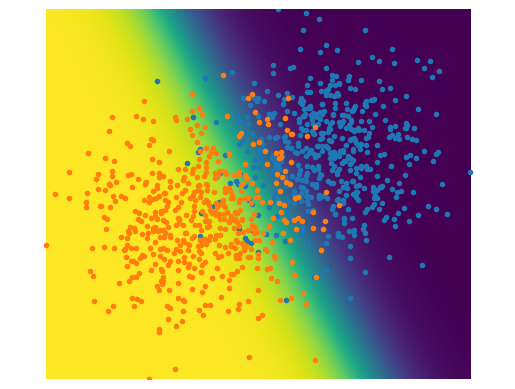

In [380]:
plt.clf
plt.imshow(Theta.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
plt.axis('equal')
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('off');

__Exercise 2__

Pruebe la influencia del offset de separación $\omega$ en el resultado.

In [381]:
## Inserta tu codigo.


C:\Users\rueda\AppData\Local\Temp\ipykernel_26776\1430431261.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  energy[i] = E(w, X, y)


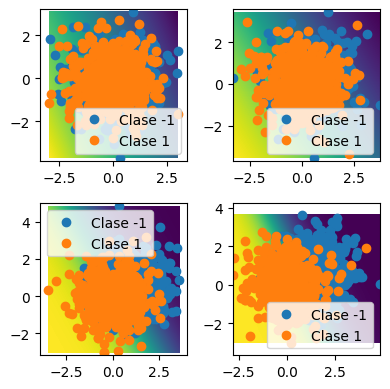

In [382]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X, y, tau, max_iter=1000):
    w = np.zeros((X.shape[1], 1))
    energy = np.zeros(max_iter)

    for i in range(max_iter):
        grad = nablaE(w, X, y)
        w = w - tau * grad
        energy[i] = E(w, X, y)

    return w, energy


def plot_results_grid(X, y, w, omega, ax):
    g = 201
    tx = np.linspace(X[:, 0].min(), X[:, 0].max(), num=g)
    ty = np.linspace(X[:, 1].min(), X[:, 1].max(), num=g)
    [B, A] = np.meshgrid(ty, tx)
    G = np.vstack([A.flatten(), B.flatten()]).transpose()

    Theta = theta(np.hstack((G, np.ones((len(G), 1)))).dot(w))
    Theta = Theta.reshape((g, g))

    ax.imshow(Theta.transpose(), origin="lower", extent=[tx.min(), tx.max(), ty.min(), ty.max()])
    ax.axis('equal')


    I = np.where(y == -1)[0]
    J = np.where(y == 1)[0]
    ax.plot(X[I, 0], X[I, 1], 'o', label='Clase -1')
    ax.plot(X[J, 0], X[J, 1], 'o', label='Clase 1')
   
    ax.legend()


n = 1000
p = 2
omegas = [0, 0.5, 1.0, 1.5]

fig, axs = plt.subplots(2, 2, figsize=(4, 4))

for i, omega in enumerate(omegas):
    omega_vector = np.array([1, 0.5]) * omega
    n1 = int(n / 2)
    X = np.vstack((np.random.randn(n1, 2), np.random.randn(n1, 2) + np.ones([n1, 1]) * omega_vector))
    y = np.vstack((np.ones([n1, 1]), -np.ones([n1, 1])))


    X = np.hstack((X, np.ones((n, 1))))


    tau = 0.1


    w, _ = gradient_descent(X, y, tau)
    plot_results_grid(X, y, w, omega, axs[i // 2, i % 2])

plt.tight_layout()
plt.show()


__Exercise 3__

Pruebe la clasificación logística en un conjunto de datos reales. [LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/). Divida los datos en entrenamiento y prueba para evaluar el
para evaluar el rendimiento de la clasificación y comprobar el impacto de la regularización.

In [383]:
import pandas as pd


file_path = 'Flourclass.txt'

labels = []
features = []

with open(file_path, 'r') as file:
    for line in file:
        # Separar la etiqueta y las características
        parts = line.strip().split()
        label = int(parts[0]) 
        labels.append(label)
        feature_dict = {}
        for item in parts[1:]:
            index, value = item.split(":")
            feature_dict[int(index)] = float(value)
        features.append(feature_dict)

# Convertir las etiquetas en una serie
labels_series = pd.Series(labels, name="label")

# Convertir las características a un DataFrame
features_df = pd.DataFrame(features).fillna(0)  # Rellenar valores faltantes con 0

# Concatenar las etiquetas y las características en un único DataFrame
df = pd.concat([labels_series, features_df], axis=1)

X = df.drop(columns=["label"]).to_numpy()
y = df["label"].to_numpy().reshape(-1, 1)  


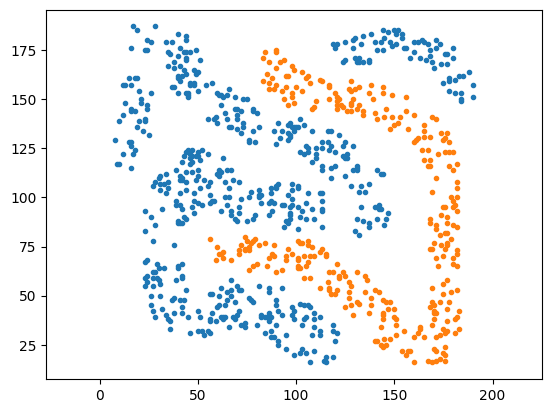

In [384]:
n = len(y)
I = find(y== -1)
J = find(y==  1)
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal');
X = np.hstack((X, np.ones((n, 1))))
#Datos originales

(436,)
(253,)


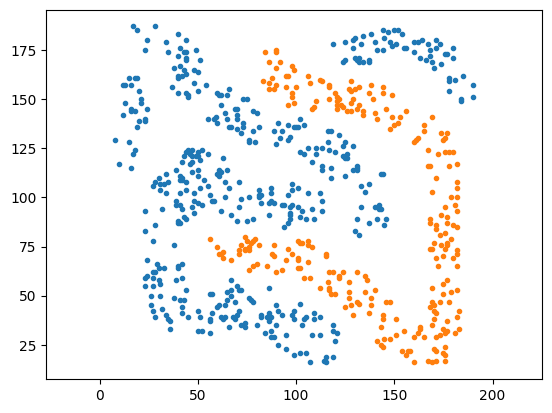

In [385]:
from sklearn.model_selection import train_test_split
y = df.iloc[:, 0].values.reshape(-1, 1)
X = df.iloc[:, 1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#conjunto de entrenamiento
n = len(y_train)
I = find(y_train== -1)
J = find(y_train==  1)
plt.plot(X_train[I,0], X_train[I,1], '.')
plt.plot(X_train[J,0], X_train[J,1], '.')
plt.axis('equal');
print(I.shape)
print(J.shape)

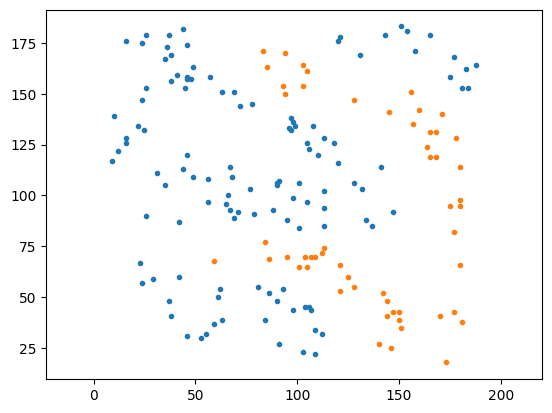

In [386]:
#Conjunto de prueba 
n = len(y_test)
I = find(y_test== -1)
J = find(y_test==  1)
plt.plot(X_test[I,0], X_test[I,1], '.')
plt.plot(X_test[J,0], X_test[J,1], '.')
plt.axis('equal');

In [387]:
def gd(X, y, tau, w, max_iter=1000):
    for i in range(max_iter):
        grad = nablaE(w, X, y)
        w = w - tau * grad
    return w

In [388]:
import pandas as pd
tau = 1; 
max_iter = 2500
n = y_train.shape[0] # numero de muestras
p = 2 # Dimension
omega = 3
w = np.zeros((p+1,1))

# Compute the mean and standard deviation of each column
mean = np.mean(X_train, axis=0)
std_dev = np.std(X_train, axis=0)

# Apply Z-score normalization to each column
X_train = (X_train - mean) / std_dev
I = np.where(y_train == -1)[0]
J = np.where(y_train == 1)[0]

X_train[I,1] += 1*omega
X_train[I,0] += -0.2*omega



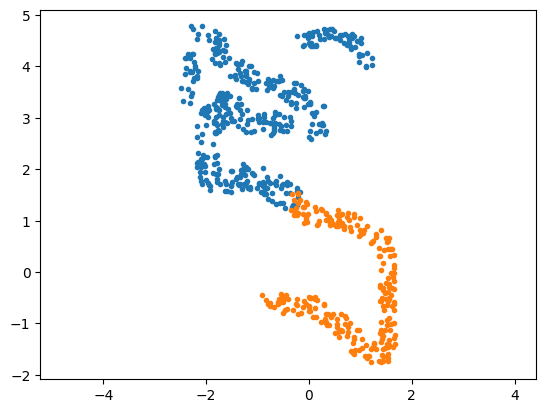

In [389]:
n = len(y_train)
I = find(y_train== -1)
J = find(y_train==  1)
plt.plot(X_train[I,0], X_train[I,1], '.')
plt.plot(X_train[J,0], X_train[J,1], '.')
plt.axis('equal');

In [ ]:
import numpy as np

# Función de pérdida logarítmica
def L(s, y):
    n = len(y)  # Número de muestras
    return (1/n) * np.sum(np.log(1 + np.exp(-s * y)))

# Función de error (costo) para el descenso de gradiente
def E(w, X, y):
    s = X.dot(w)  # Producto punto de las características y los pesos
    return L(s, y)

# Función sigmoide
def theta(v):
    return 1 / (1 + np.exp(-v))

# Gradiente de la función de pérdida
def nablaL(s, y):
    # Derivada de la función de pérdida logística con respecto a la predicción
    return -(y/len(y)) * theta(-s * y)

# Gradiente del error (costo) con respecto a los pesos
def nablaE(w, X, y):
    s = X.dot(w)  # Producto punto de las características y los pesos
    return X.T.dot(nablaL(s, y))  # Gradiente promedio



(-2.486886646647691, 1.6796252032926664, -1.760329373687707, 4.777354358419412)

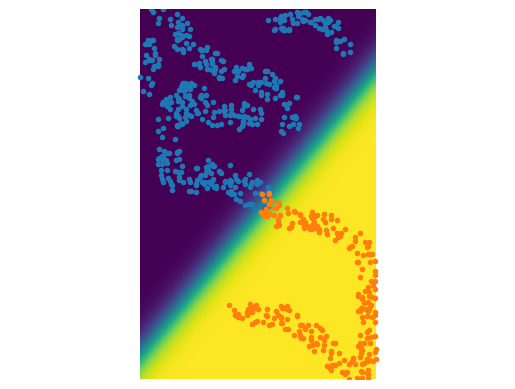

In [391]:
w = gd(AddBias(X_train), y_train, tau, w, max_iter)

g = 201
tx = np.linspace( X_train[:,0].min(), X_train[:,0].max(),num=g)
ty = np.linspace( X_train[:,1].min(), X_train[:,1].max(),num=g)
[B,A] = np.meshgrid(ty,tx)
G = np.vstack([A.flatten(), B.flatten()]).transpose()
Theta = theta(AddBias(G).dot(w))
Theta = Theta.reshape((g,g))
plt.clf()
plt.imshow(Theta.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
plt.axis('equal')
plt.plot(X_train[I,0], X_train[I,1], '.')
plt.plot(X_train[J,0], X_train[J,1], '.')
plt.axis('off')

In [392]:
# Función para predecir usando el modelo entrenado
def predict(X, w):
    # Agregar un sesgo a X
    X_bias = AddBias(X)
    # Calcular probabilidades
    probs = theta(X_bias.dot(w))
    # Convertir probabilidades a clases (-1 o 1) usando un umbral de 0.5
    return np.where(probs >= 0.5, 1, -1)

In [393]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_test = (X_test - mean) / std_dev

y_pred = predict(X_test, w)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print("Precisión (Accuracy):", accuracy)
print("Precisión por clase (Precision):", precision)
print("Recuperación (Recall):", recall)
print("F1-Score:", f1)

Precisión (Accuracy): 0.48554913294797686
Precisión por clase (Precision): 0.375886524822695
Recuperación (Recall): 0.9814814814814815
F1-Score: 0.5435897435897435


In [394]:
def L_regularizado(s, y):
    n = y.shape[0]
    # Función de pérdida logística con regularización
    return (1 / n) * np.sum(np.log(1 + np.exp(-s * y)))

def E_regularizado(w, X, y, lmbda):
    # Costo total con regularización L2
    n = y.shape[0]
    return L(X.dot(w), y, n) + (lmbda / 2) * np.sum(w[1:]**2)  # Excluimos w[0] (el sesgo)

def nablaE_regularizado(w, X, y, lmbda):
    # Gradiente del costo total con regularización L2
    grad = X.T.dot(nablaL(X.dot(w), y))
    grad[1:] += lmbda * w[1:]  # Aplicamos regularización solo a w[1:] (no al sesgo w[0])
    return grad

def gd_regularizado(X, y, tau, w, lmbda, max_iter=1000):
    # Descenso de gradiente con regularización L2
    for i in range(max_iter):
        grad = nablaE_regularizado(w, X, y, lmbda)
        w = w - tau * grad
    return w


(-2.486886646647691, 1.6796252032926664, -1.760329373687707, 4.777354358419412)

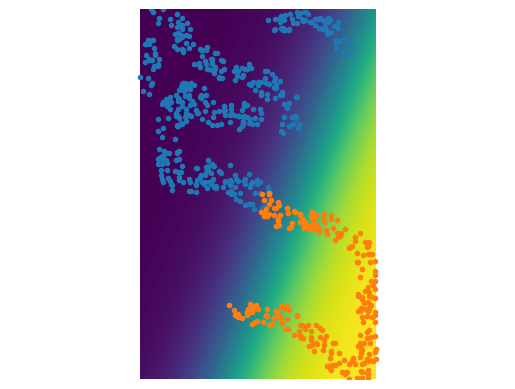

In [395]:
# Parámmetros de entrenamiento
lmda = 0.1  # Factor de regularización
tau = 1  # Tasa de aprendizaje
max_iter = 2500  # Número de iteraciones

# Inicializar los pesos
p = X_train.shape[1]  # Dimensión de los datos de entrenamiento
w = np.zeros((p+1, 1))  # Vector de pesos, incluye el sesgo

# Entrenar el modelo con regularización L2
w_R = gd_regularizado(AddBias(X_train), y_train, tau, w, lmbda, max_iter)

g = 201
tx = np.linspace( X_train[:,0].min(), X_train[:,0].max(),num=g)
ty = np.linspace( X_train[:,1].min(), X_train[:,1].max(),num=g)
[B,A] = np.meshgrid(ty,tx)
G = np.vstack([A.flatten(), B.flatten()]).transpose()
Theta = theta(AddBias(G).dot(w_R))
Theta = Theta.reshape((g,g))
plt.clf()
plt.imshow(Theta.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
plt.axis('equal')
plt.plot(X_train[I,0], X_train[I,1], '.')
plt.plot(X_train[J,0], X_train[J,1], '.')
plt.axis('off')



In [ ]:
y_pred = predict(X_test, w_R)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print("Precisión (Accuracy):", accuracy)
print("Precisión por clase (Precision):", precision)
print("Recuperación (Recall):", recall)
print("F1-Score:", f1)



Precisión (Accuracy): 0.6589595375722543
Precisión por clase (Precision): 0.47368421052631576
Recuperación (Recall): 0.8333333333333334
F1-Score: 0.6040268456375839


Kernelized Logistic Classification
----------------------------------
La clasificación logística intenta separar las clases utilizando un hiperplano de separación lineal $ \enscond{x}{\dotp{w}{x}=0}. $


Para generar un límite de decisión no lineal, se puede sustituir el modelo
modelo lineal paramétrico por un modelo no lineal [no paramétrico].(https://en.wikipedia.org/wiki/Nonparametric_statistics) gracias a la
kernelización. Es no paramétrico en el sentido de que el número de
parámetro crece con el número $n$ de muestra (mientras que para el método básico
básico, el número de parámetros es $p$. Esto permite en particular
generar límites de decisión de complejidad arbitraria.


El inconveniente es que la complejidad numérica del método crece
(al menos) cuadráticamente con $n$.


Sin embargo, la buena noticia es que gracias a la teoría de
 [reproducción de espacios de Hilbert del núcleo](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space)
(RKHS), todavía se puede calcular esta función de decisión no lineal
utilizando (casi) el mismo algoritmo numérico.


Dado un kernel $ \kappa(x,z) \in \RR $ definido para $(x,z) \in \RR^p$,
el método kernelizado sustituye el funcional de decisión lineal $f(x) =
\dotp{x}{w}$ por una suma de kernel centrada en las muestras
$$ f_h(x) = \sum_{i=1}^p h_i k(x_i,x) $$
donde $h \in \RR^n$ es el vector desconocido de peso a encontrar


Al utilizar el núcleo lineal $\kappa(x,y)=\dotp{x}{y}$, se recupera
el método lineal estudiado anteriormente.


Macro para calcular la matriz de distancia euclidiana al cuadrado por pares.

In [397]:
# Lento
def distmat1(X,Z):
    D = np.zeros((X.shape[0],Z.shape[0]))
    for i in np.arange(0,X.shape[0]):
        for j in np.arange(0,Z.shape[0]):
            D[i,j] = np.linalg.norm( X[i,:]-Z[j,:] );
    return D


In [398]:
# Rapido
from scipy import spatial
def distmat(X,Z):
  return spatial.distance.cdist(X,Z)**2

El kernel gaussiano es el más conocido y utilizado
$$ \kappa(x,y) \eqdef e^{-\frac{\norm{x-y}^2}{2\sigma^2}}.  $$
El parámetro de ancho de banda $\si>0$ es crucial y controla la localidad de
del modelo. Suele ajustarse mediante validación cruzada.


In [399]:
def kappa(X,Z,sigma):
  return np.exp( -distmat(X,Z)/(2*sigma**2) )

Generemos datos sintéticos en 2D que no son separables por un
hiperplano.

In [400]:
n = 1000
p = 2;
t = 2*np.pi*np.random.randn(n1,1);
R = 2.5;
r = R*(1.5 + .2*np.random.randn(n1,1)); # radius
X1 = np.hstack((np.cos(t)*r, np.sin(t)*r));
X = np.vstack((np.random.randn(n1,2), X1))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))

Veamos las clases

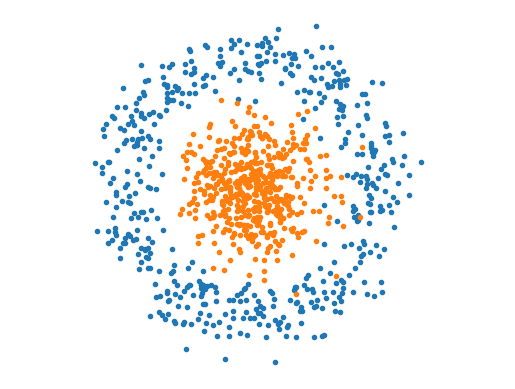

In [401]:
I = find(y==-1)
J = find(y==1)
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal')
plt.axis('off');

Una vez evaluado en los puntos de la malla, el núcleo define una matriz
$$ K = (\kappa(x_i,x_j))_{i,j=1}^n \in \RR^{n \times n}.  $$

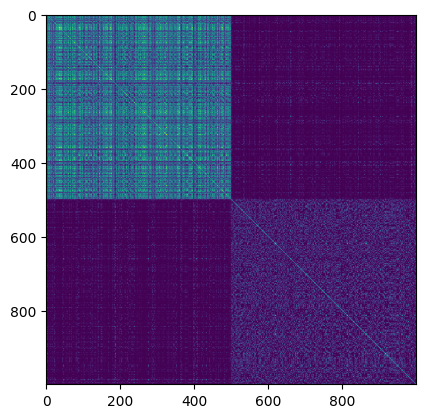

In [402]:
sigma = 1;
K = kappa(X,X,sigma)
plt.imshow(K);

Los núcleos válidos son aquellos que dan lugar a matrices simétricas positivas
$K$. El núcleo lineal y el gaussiano son funciones de núcleo válidas. Otros
kernels populares incluyen el kernel polinómico $ \dotp{x}{y}^a $ para $a
\geq 1$ y el kernel laplaciano $ \exp( -\norm{x-y}^2/\si ) $.


La minimización Logística kernelizada es la siguiente
  $$ \umin{h} F(h) \eqdef \Ll(K h,y). $$

In [403]:
def F(h,K,y):
   return L(K.dot(h),y)
def nablaF(h,K,y):
   return K.transpose().dot( nablaL(K.dot(h),y) )

Esta minimización puede relacionarse con un problema de optimización de dimensión infinita
donde se minimiza directamente sobre la función $f$. Este
se demuestra que es equivalente al problema de optimización finito-dimensional anterior
gracias a la teoría de RKHS.

__Exercise 4__

Implementar un descenso gradiente para minimizar $F(h)$.
Monitorizar la caída de energía.
Probar diferentes tamaños de paso, y comparar con la teoría.

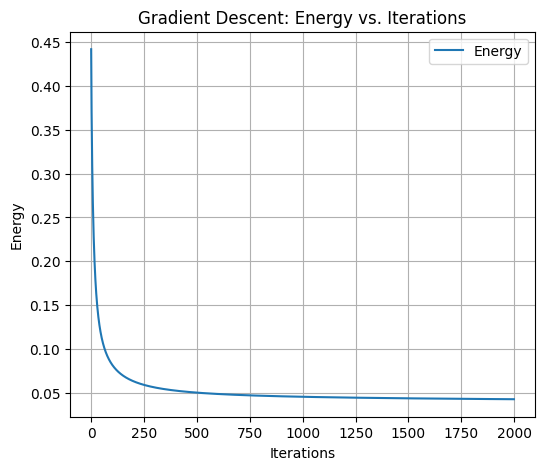

In [404]:
def gradient_descent(K, y, tau, max_iter=2000):
    h = np.zeros((K.shape[1], 1))
    energy_values = []

    for i in range(max_iter):

        grad_F = nablaF(h, K, y)

        h -= tau * grad_F

        energy = F(h, K, y)
        energy_values.append(energy)

    return h, energy_values

tau = 0.1
max_iter = 2000

h, energy_values = gradient_descent(K, y, tau, max_iter)

plt.figure(figsize=(6, 5))
plt.plot(range(len(energy_values)), energy_values, label="Energy")
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Gradient Descent: Energy vs. Iterations")
plt.legend()
plt.grid(True)
plt.show()


Una vez encontrado este óptimo $h$, las probabilidades de clase en un punto
$x$ se obtienen como
  $$ (\th(f_h(x)), 1-\th(f_h(x)) $$
donde $f_h$ se ha definido anteriormente.


Evaluamos esta probabilidad de clasificación en una cuadrícula.

In [405]:
q = 201
tmax = 5
t = np.linspace(-tmax,tmax,num=q)
[B,A] = np.meshgrid( t,t )
G = np.vstack([A.flatten(), B.flatten()]).transpose()
K1 = kappa(G,X,sigma)
Theta = theta( K1.dot(h) )
Theta = Theta.reshape((q,q))

Muestra la probabilidad de clasificación.

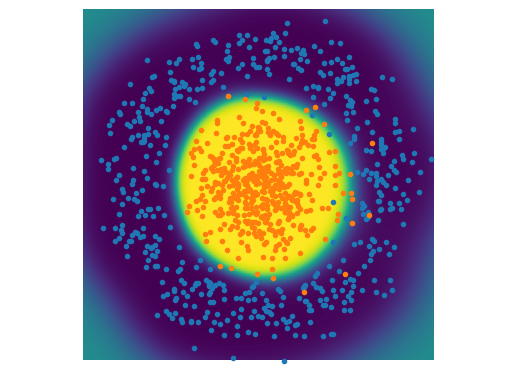

In [406]:
plt.clf
plt.imshow(Theta.transpose(), origin="lower",  extent=[-tmax, tmax, -tmax, tmax])
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal')
plt.axis('off');

__Exercise 5__

Mostrar la evolución de la probabilidad de clasificación con $\sigma$

In [407]:
## Inserta tu codigo.

sigma1 = 0.1;
sigma2 = 0.5;
sigma3 = 1;
sigma4 = 4;

K1 = kappa(X,X,sigma1)
K2 = kappa(X,X,sigma2)
K3 = kappa(X,X,sigma3)
K4 = kappa(X,X,sigma4)


iter = 2000
gamma = 0.1

h1,_ = gradient_descent(K1, y, gamma, iter)
h2,_ = gradient_descent(K2, y, gamma, iter)
h3,_ = gradient_descent(K3, y, gamma, iter)
h4,_ = gradient_descent(K4, y, gamma, iter)

ks1  = kappa(G,X,sigma1)
ks2  = kappa(G,X,sigma2)
ks3  = kappa(G,X,sigma3)
ks4  = kappa(G,X,sigma4)

theta1 = theta( ks1.dot(h1) )
theta1 = theta1.reshape((q,q))

theta2 = theta( ks2.dot(h2) )
theta2 = theta2.reshape((q,q))

theta3 = theta( ks3.dot(h3) )
theta3 = theta3.reshape((q,q))

theta4 = theta( ks4.dot(h4) )
theta4 = theta4.reshape((q,q))



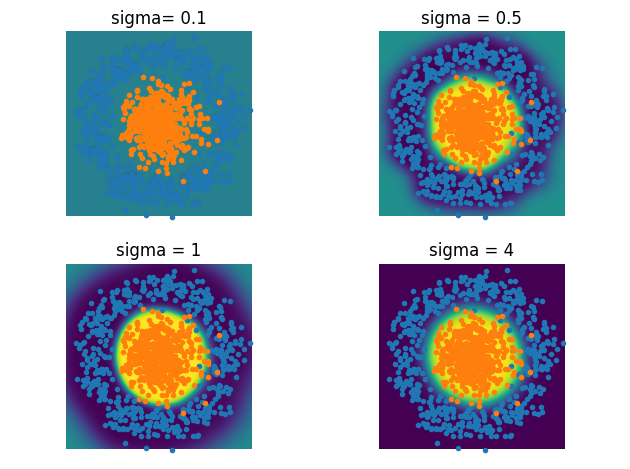

In [408]:
plt.subplot(2,2,1)
plt.clf
plt.imshow(theta1.transpose(), origin= "lower", extent= [-tmax, tmax, -tmax, tmax])
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal')
plt.axis('off');
plt.title('sigma= 0.1')


plt.subplot(2, 2, 2)
plt.imshow(theta2.transpose(), origin="lower", extent=[-tmax, tmax, -tmax, tmax])
plt.plot(X[I, 0], X[I, 1], '.')
plt.plot(X[J, 0], X[J, 1], '.')
plt.axis('equal')
plt.axis('off')
plt.title('sigma = 0.5')


plt.subplot(2, 2, 3)
plt.imshow(theta3.transpose(), origin="lower", extent=[-tmax, tmax, -tmax, tmax])
plt.plot(X[I, 0], X[I, 1], '.')
plt.plot(X[J, 0], X[J, 1], '.')
plt.axis('equal')
plt.axis('off')
plt.title('sigma = 1')

plt.subplot(2, 2, 4)
plt.imshow(theta4.transpose(), origin="lower", extent=[-tmax, tmax, -tmax, tmax])
plt.plot(X[I, 0], X[I, 1], '.')
plt.plot(X[J, 0], X[J, 1], '.')
plt.axis('equal')
plt.axis('off')
plt.title('sigma = 4')

plt.tight_layout()
plt.show()

__Exercise 6__

Separate the dataset into a training set and a testing set. Evaluate the classification performance
for varying $\si$. Try to introduce regularization and minmize
$$ \umin{h} F(h) \eqdef \Ll(K h,y) + \la R(h) $$
where for instance $R=\norm{\cdot}_2^2$ or  $R=\norm{\cdot}_1$.

In [409]:
## Inserta tu codigo

Multi-Classes Logistic Classification
-------------------------------------
El método de clasificación logística se extiende a un número arbitrario
$k$ de clases considerando una familia de vectores de peso $ w_{\ell=1}^k$, que se almacenan convenientemente como columnas de la matriz $W \in \RR^{p \times k}$.


Esto permite modelizar probabilísticamente la pertenencia de un punto $x \in \RR^p $ a una
las clases utilizando un modelo exponencial
  $$ h(x) = \pa{ \frac{ e^{-\dotp{x}{w_\ell}} }{ \sum_m e^{-\dotp{x}{w_m}} } }_\ell $$
Este vector $h(x) \in [0,1]^k $ describe la probabilidad de $x$
pertenezca a las distintas clases, y $ \sum_\ell h(x)_\ell = 1 $.


El cálculo de $w$ se obtiene resolviendo un estimador de máxima verosimilitud
estimador
   $$ \umax{w \in \RR^k} \frac{1}{n} \sum_{i=1}^n \log( h(x_i)_{y_i} ) $$
donde recordamos que $y_i \in \{1,\ldots,k\}$ es el índice de clase de
punto $x_i$.


Esto es reescrito convenientemente como
  $$ \umin{w} \sum_i \text{LSE}( XW )_i - \dotp{XW}{D} $$
donde $D \in \{0,1\}^{n \times k}$ son las matrices binarias de índice de clase
  $$  D_{i,\ell} = \choice{
          1 \qifq y_i=\ell, \\
          0 \quad \text{otherwise}.
      }
   $$
y LSE es el operador log-sum-exp
  $$ \text{LSE}(S) = \log\pa{ \sum_\ell \exp(S_{i,\ell}) } \in \RR^n. $$

Recuerde que **max = - min**

https://people.tamu.edu/~sji/classes/LR.pdf

In [410]:
def LSE0(S):
  return np.log( np.exp(S).sum(axis=1,keepdims=1))

El cálculo de LSE es inestable para gran valor de $S_{i,\ell}$ (desbordamiento numérico, produciendo NaN), pero esto puede ser
solucionado restando el elemento más grande de cada fila,
ya que $ \text{LSE}(S+a)=\text{LSE}(S)+a $ si $a$ es constante a lo largo de las filas. Esto es
el [célebre truco LSE](https://en.wikipedia.org/wiki/LogSumExp).

In [411]:
def max2(S):
  return np.tile( S.max(axis=1,keepdims=1), (1,S.shape[1]) )
def LSE(S):
  return LSE0( S-max2(S) ) + S.max(axis=1,keepdims=1)

In [412]:
# verifiquemos la igualdad entre LSE y LSE0
S = np.random.randn(4,5)
np.linalg.norm( LSE(S)-LSE0(S) )

4.440892098500626e-16

El gradiente d el operador LSe es el
$\newcommand{\eqdef}{\equiv}$
<https://en.wikipedia.org/wiki/Softmax_function soft-max operator>
$$  \nabla \text{LSE}(S) = \text{SM}(S) \eqdef
      \pa{
          \frac{
                  e^{S_{i,\ell}}
              }{
                  \sum_m e^{S_{i,m}}
              } }   $$

In [413]:
def SM0(S):
  return np.exp(S) / np.tile( np.exp(S).sum(axis=1,keepdims=1), (1, S.shape[1]) );

Similarmente a el LSE, este necesita ser estabilizado

In [414]:
def SM(S):
  return SM0(S-max2(S))

In [415]:
# Verifiquemos la igualdad de SM y SM0
np.linalg.norm( SM(S)-SM0(S) )

1.3474011648869763e-16

Cargamos un conjunto de datos de $n$ imágenes de tamaño $p = 8 \times 8$, que representan dígitos de 0
a 9 (por lo que hay $k=10$ clases).


Cargamos el conjunto de datos y lo permutamos aleatoriamente.
Separar las características $X$ de los datos $y$ para predecir la información.

$n$ es el número de muestras, $p$ es la dimensionalidad de las características, $k$
el número de clases.

Visualizemos algunos dígitos de muestra

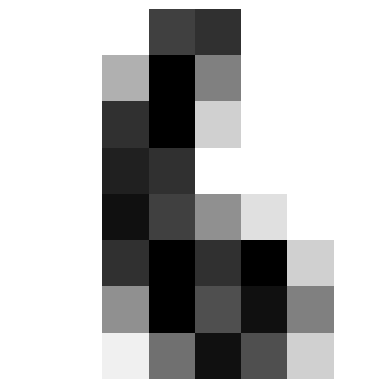

In [416]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.images
y = digits.target
k = np.unique(y).size

f = X[6, :, :]

f = np.reshape(f, (8, 8))
plt.imshow(f.max() - f, cmap="gray")
plt.axis('off')
plt.show()



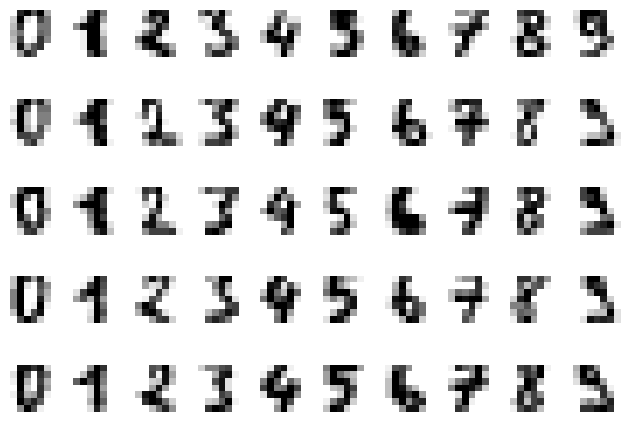

In [417]:
k = 10
q = 5

plt.clf()
for i in np.arange(0, k):
    I = np.where(y == i)[0]
    num_images = min(q, len(I))

    for j in np.arange(0, num_images):
        f = X[I[j], 1:, 1:]
        f = np.reshape(f, (7, 7))
        plt.subplot(q, k, j*k + i + 1)
        plt.imshow(f.max() - f, cmap="gray")
        plt.axis('off')

plt.tight_layout()
plt.show()

Reducción de la dimensionalidad mediante PCA.

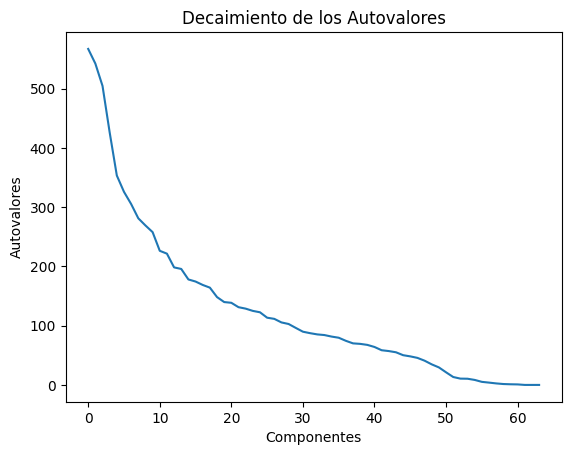

In [418]:
n_components = 64
X = digits.images.reshape((digits.images.shape[0], -1))
y = digits.target


X1 = X - X.mean(axis=0)

U, s, Vt = np.linalg.svd(X1, full_matrices=False)

V = Vt[:n_components]

n_components = 64
Xr = np.dot(X1, Vt[:n_components].T)

plt.plot(s)
plt.xlabel('Componentes')
plt.ylabel('Autovalores')
plt.title('Decaimiento de los Autovalores')
plt.show()

Display in 2D.

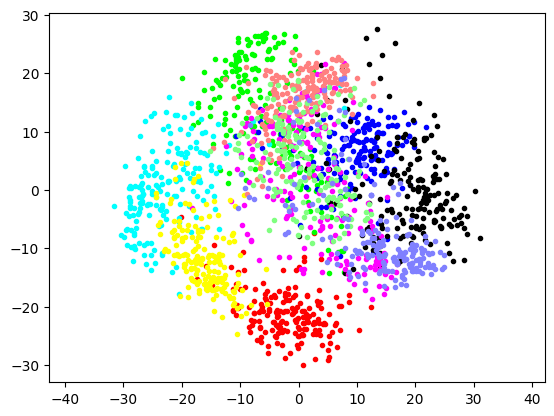

In [419]:
col = np.array( [ [1,0,0], [0,1,0], [0,0,1], [0,0,0], [0,1,1], [1,0,1], [1,1,0], [1,.5,.5], [.5,1,.5], [.5,.5,1]  ] ).transpose()
for i in np.arange(0,k):
    I = find(y==i)
    plt.plot(Xr[I,0], Xr[I,1], '.', color=col[:,i])
plt.axis('equal');

Veamoslos en 3D.

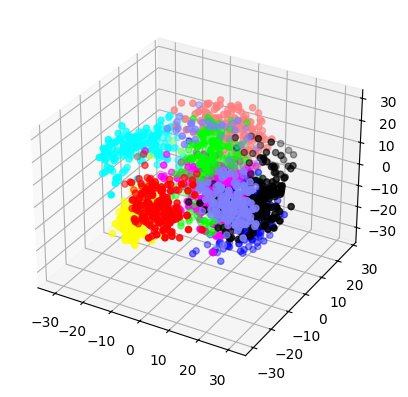

In [420]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in np.arange(0, k):
    I = np.where(y == i)[0]
    ax.scatter(Xr[I, 0], Xr[I, 1], Xr[I, 2], '.', color=col[:, i])

plt.axis('tight')
plt.show()


Obtengamos la matriz $D$

In [421]:
[n, _] = X.shape
D = np.double(np.tile(np.arange(k), (n, 1)) == np.tile(y.reshape(-1, 1), (1, k)))

Producto interno entre dos vectores

In [422]:
def dotp(x,y):
  return x.flatten().dot( y.flatten().transpose() )

Definamos la energia $E(W)$.

In [423]:
def E(W): return 1/n*( LSE(X.dot(W)).sum() - dotp(X.dot(W),D)  )

Y su gradiente
  $$ \nabla E(W) =  \frac{1}{n} X^\top ( \text{SM}(X W) - D ).  $$

In [424]:
def nablaE(W): return 1/n * X.transpose().dot( SM(X.dot(W)) -  D  )

__Exercise 7__

Implemente un gradiente descendente
$$ W_{\ell+1} = W_\ell - \tau_\ell \nabla E(W_\ell). $$
Monitoree el decaimietno de la energia

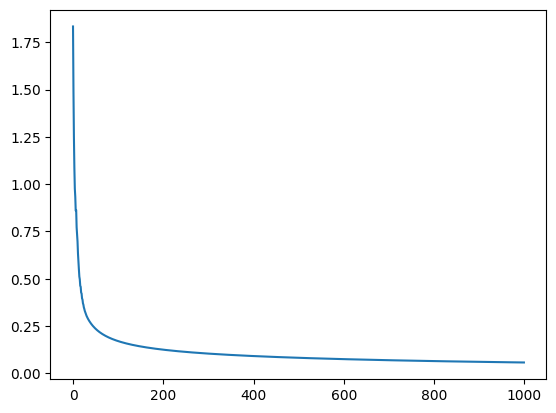

In [425]:
W = np.zeros((X.shape[1], k))
tau = 0.01
num_iter = 1000
energies = []

for i in range(num_iter):
    grad = nablaE(W)

    W = W - tau * grad

    energy = E(W)
    energies.append(energy)

plt.plot(energies)
plt.show()


Generemos una cuadrícula 2D de puntos sobre el espacio PCA y mapearla al espacio de características.

In [426]:

M = np.abs(Xr.flatten()).max()
q = 201
t = np.linspace(-M,M,num=q)
[B,A] = np.meshgrid(t,t)
G0 = np.vstack([A.flatten(), B.flatten()]).transpose()
Xmean = np.tile( X.mean(axis=0,keepdims=1), (q**2,1) )
G = G0.dot(V[0:2,:]) + Xmean

Evalúe la probabilidad de clase asociada a los vectores de peso en esta cuadrícula.

In [427]:
Theta = SM(G.dot(W))
Theta = np.reshape(Theta, (q, q, k) )

Veamos cada mapa de probabilidades.

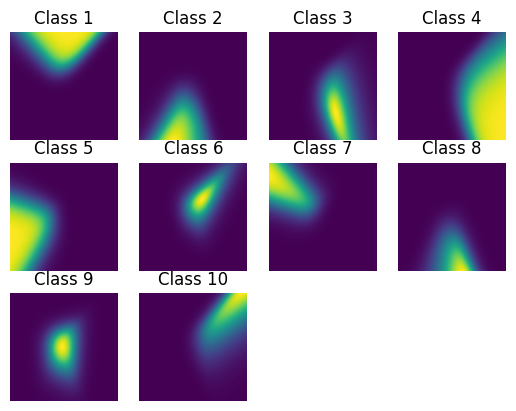

In [428]:
plt.clf
for i in np.arange(0,k):
    plt.subplot(3,4,i+1)
    plt.imshow(Theta[:,:,i].transpose());
    plt.title('Class ' + str(i+1));
    plt.axis('off')

Construye una imagen en un solo color de este mapa.

In [429]:
R = np.zeros((q,q,3))
for i in np.arange(0,k):
    for a in np.arange(0,3):
        R[:,:,a] = R[:,:,a] + Theta[:,:,i] * col[a,i]

Veamoslo

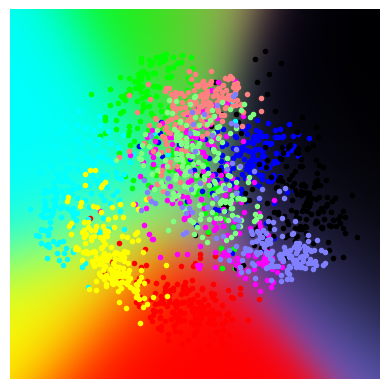

In [430]:
plt.clf
plt.imshow(R.transpose((1, 0, 2)), origin="lower", extent=[-M,M,-M,M])
for i in np.arange(0,k):
    I = find(y==i)
    plt.plot(Xr[I,0], Xr[I,1], '.', color=col[:,i])
plt.axis('off');

__Exercise 8__

Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de pruebas. Evalúe el rendimiento de la clasificación
y muestre la matriz de confusión. Puede probar el impacto de la kernlización y la regularización.

In [431]:
## Inserta tu codigo

Kernel: linear, C: 0.1
Accuracy: 0.9777777777777777
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]


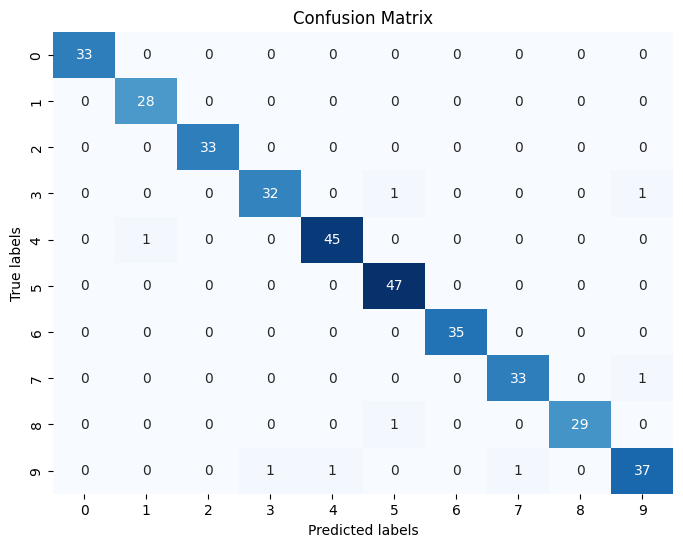

--------------------------------------------
Kernel: linear, C: 1
Accuracy: 0.9777777777777777
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]


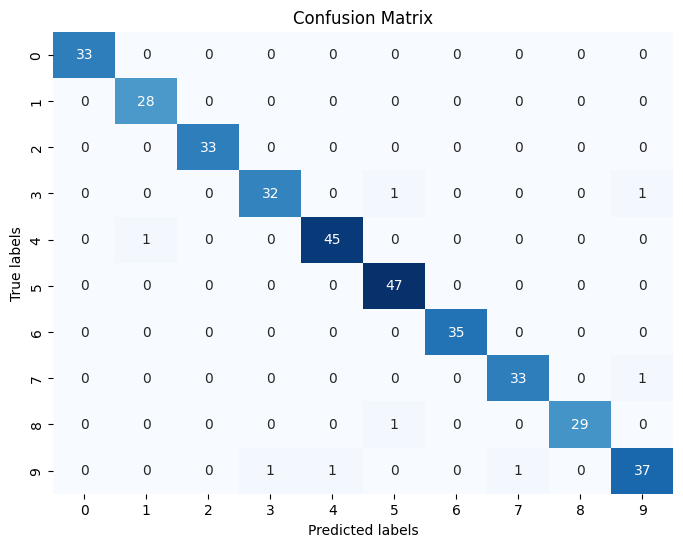

--------------------------------------------
Kernel: linear, C: 10
Accuracy: 0.9777777777777777
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]


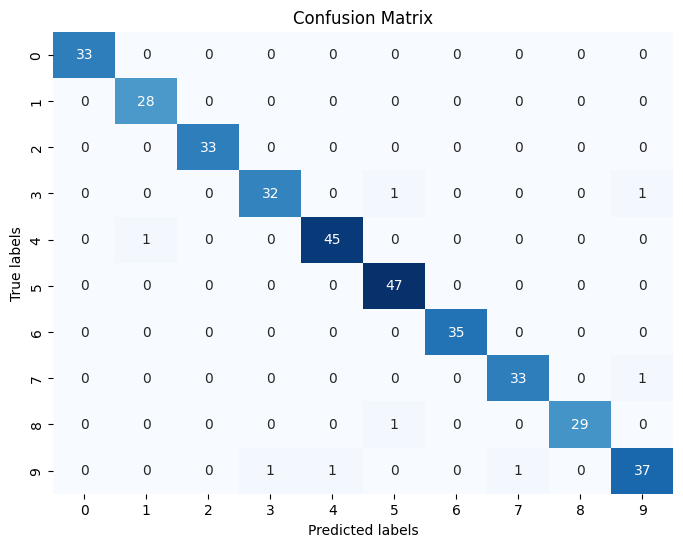

--------------------------------------------
Kernel: poly, C: 0.1
Accuracy: 0.975
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 28  1]
 [ 0  0  0  0  0  1  0  2  0 37]]


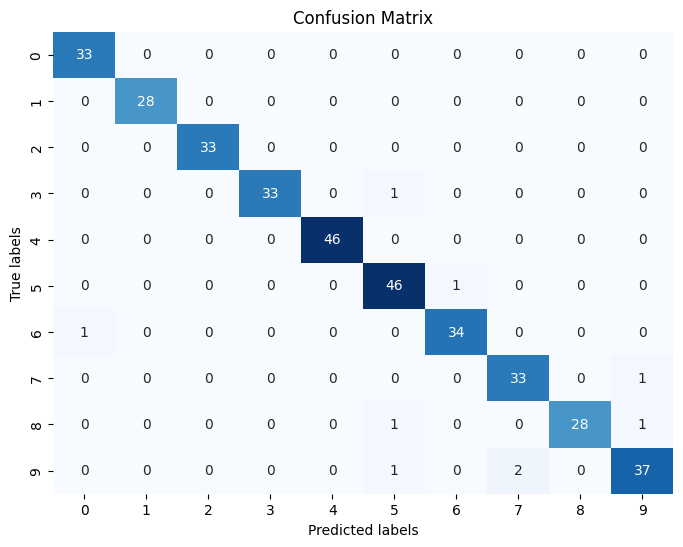

--------------------------------------------
Kernel: poly, C: 1
Accuracy: 0.9916666666666667
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  1  0 39]]


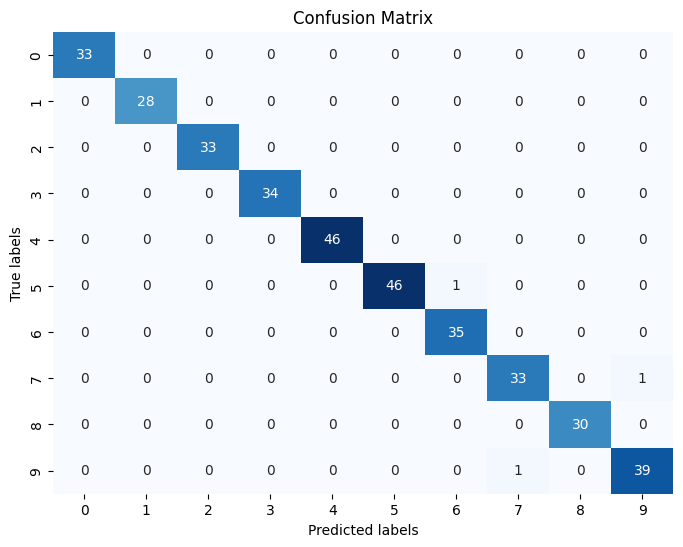

--------------------------------------------
Kernel: poly, C: 10
Accuracy: 0.9861111111111112
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  1  0 38]]


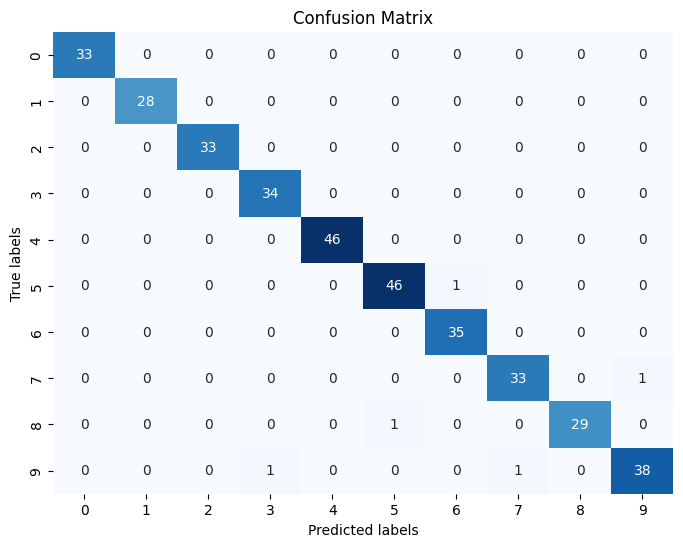

--------------------------------------------
Kernel: rbf, C: 0.1
Accuracy: 0.95
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  1  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  1  0]
 [ 0  1  0 31  0  0  0  0  2  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  3  0  0  0  1  0  0 26  0]
 [ 0  0  0  0  0  1  0  2  1 36]]


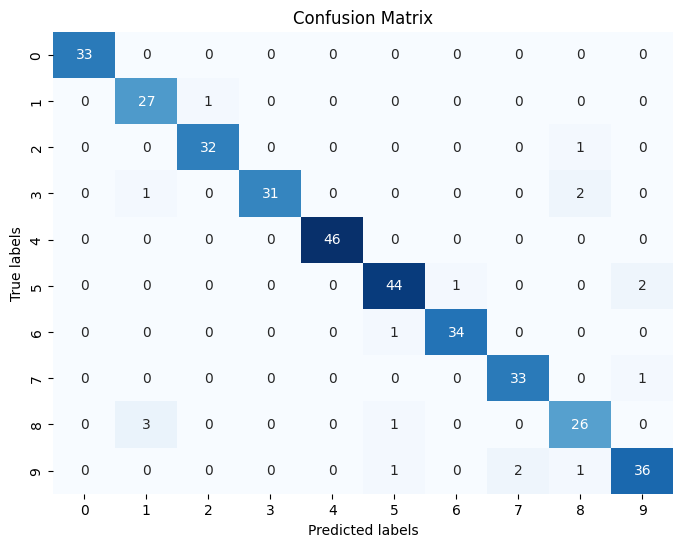

--------------------------------------------
Kernel: rbf, C: 1
Accuracy: 0.9861111111111112
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


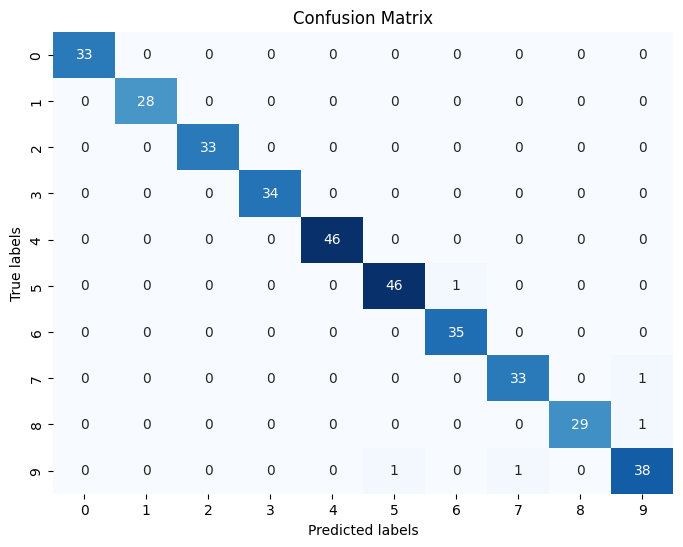

--------------------------------------------
Kernel: rbf, C: 10
Accuracy: 0.9861111111111112
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  0  0  0  0  1  0 39]]


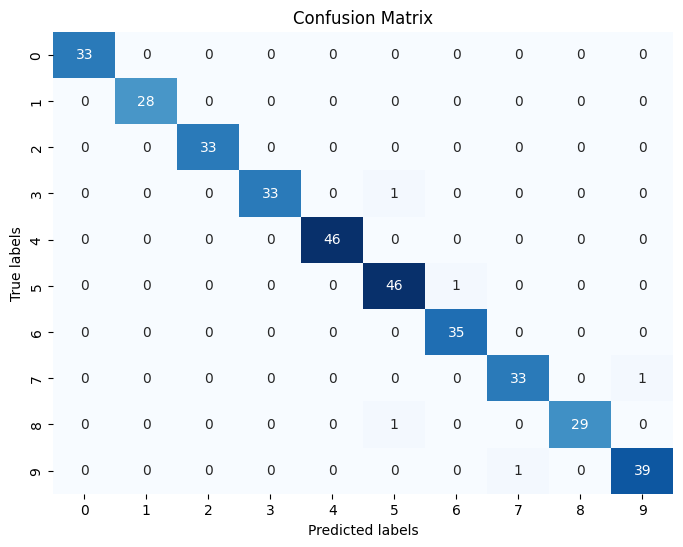

--------------------------------------------
Kernel: sigmoid, C: 0.1
Accuracy: 0.7888888888888889
Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 22  4  0  0  0  0  0  0  2]
 [ 0  1 30  1  0  0  0  1  0  0]
 [ 0  2  0 32  0  0  0  0  0  0]
 [ 0  3  0  0 42  0  0  1  0  0]
 [ 0  0  0  6  0 35  1  0  0  5]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0 17  0  2  0  1  0  1  9  0]
 [ 0  2  0 19  1  1  0  2  0 15]]


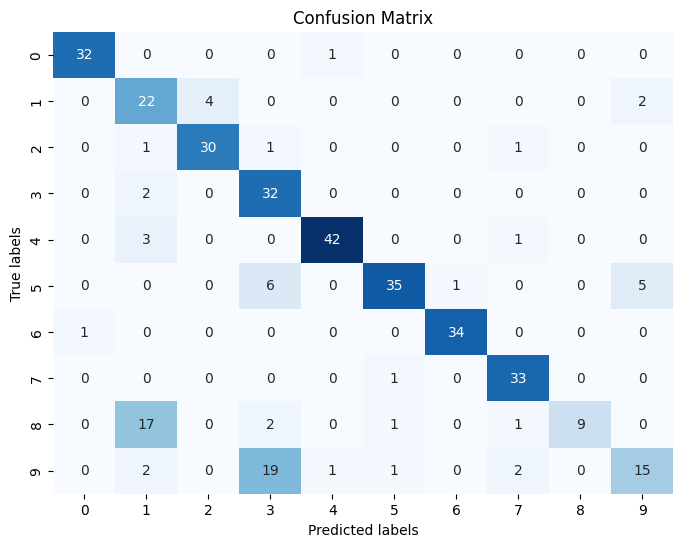

--------------------------------------------
Kernel: sigmoid, C: 1
Accuracy: 0.9
Confusion Matrix:
[[31  0  0  0  2  0  0  0  0  0]
 [ 0 21  0  0  2  0  0  1  2  2]
 [ 0  2 29  0  0  0  1  0  1  0]
 [ 0  1  0 32  0  0  0  0  1  0]
 [ 1  1  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  4  1  0  0  1  0  0 22  2]
 [ 0  2  0  0  0  1  0  1  2 34]]


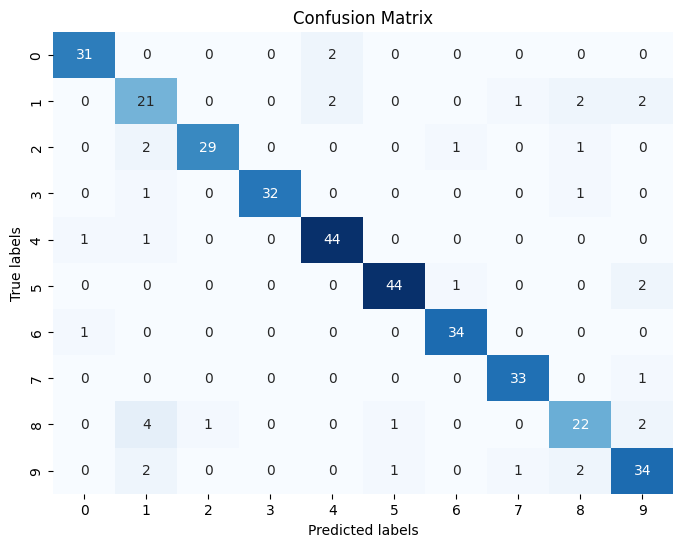

--------------------------------------------
Kernel: sigmoid, C: 10
Accuracy: 0.8083333333333333
Confusion Matrix:
[[29  3  0  0  1  0  0  0  0  0]
 [ 0 22  1  0  2  0  0  0  1  2]
 [ 0  5 23  1  0  0  0  0  4  0]
 [ 0  2  0 30  0  0  0  0  1  1]
 [ 0  3  0  0 39  0  1  1  2  0]
 [ 0  0  1  0  0 39  0  0  1  6]
 [ 0  1  0  0  1  0 33  0  0  0]
 [ 0  0  0  0  0  1  0 31  0  2]
 [ 0  9  0  0  0  0  0  0 19  2]
 [ 0  7  0  4  0  0  0  1  2 26]]


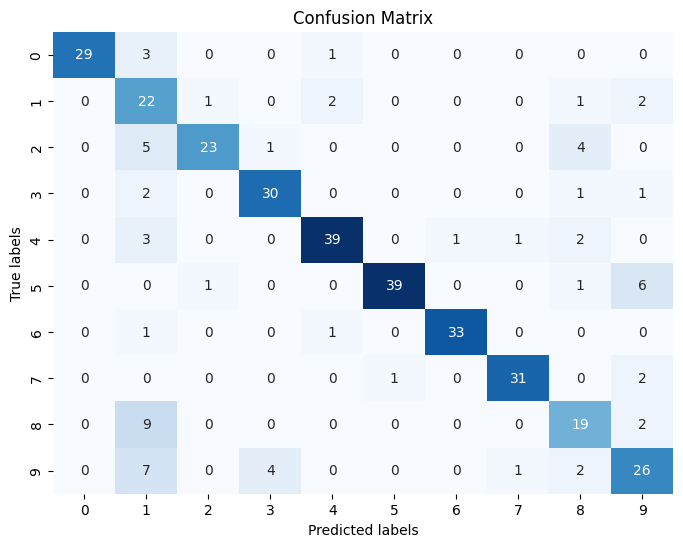

--------------------------------------------


In [432]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


digits = load_digits()
X = digits.data
y = digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]

for kernel in kernels:
    for C in C_values:

        clf = SVC(kernel=kernel, C=C, random_state=42)


        clf.fit(X_train, y_train)


        y_pred = clf.predict(X_test)


        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)


        print(f"Kernel: {kernel}, C: {C}")
        print("Accuracy:", accuracy)
        print("Confusion Matrix:")
        print(cm)


        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()
        print("--------------------------------------------")
